# Credit Card Fraud Anomaly Detection Preprocessing

This jupyter notebook is dedicated to preprocessing the data for the credit card anomaly detection. The original dataset can be found at kaggle at this link (https://www.kaggle.com/vinayaktiwari28/credit-card-fraud-detection/data). Due to its size we cannot include the original dataset or even the "cleaned" dataset that we output in this github repo. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import  MinMaxScaler

C:\Users\dial0663\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## The original dataset

In [2]:
#read the data
X = pd.read_csv("creditcard.csv", index_col = 0)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## The dataset normalized

In [3]:
#normalize the data
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


## The distribution of each feature within the dataset

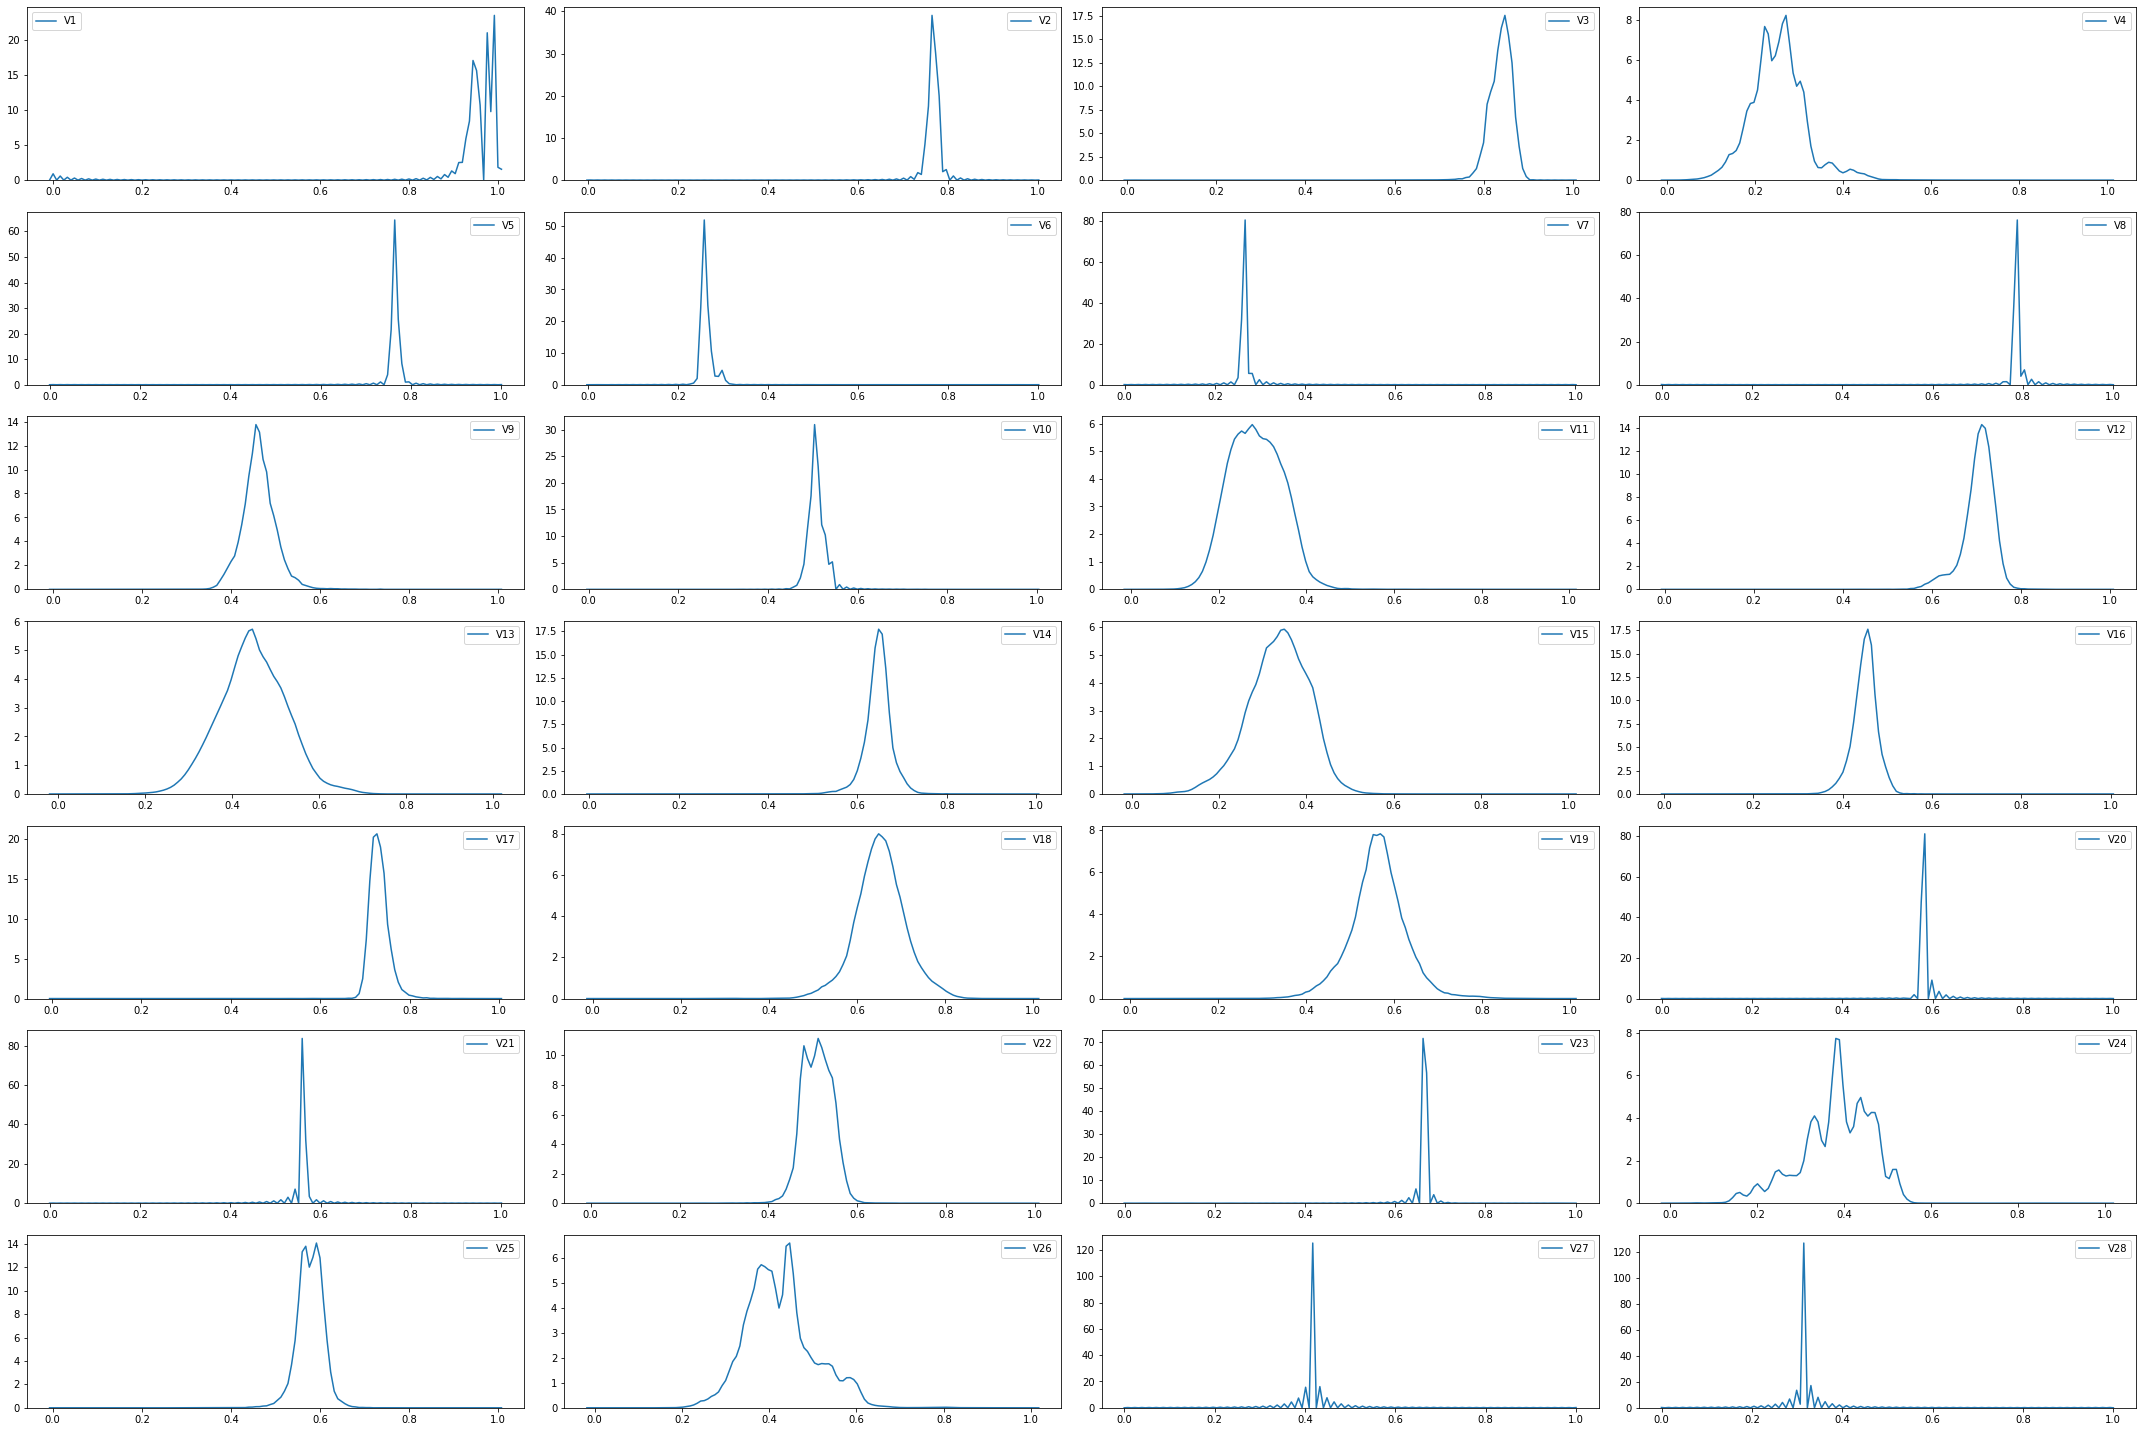

In [4]:
fig, axes = plt.subplots(7, 4, figsize=(30, 20))
axes = axes.flatten()

for ax,i in zip(axes, X.columns[:28]):
    sns.kdeplot(data= X[i], ax=ax)
    
plt.tight_layout()
plt.show()

## The frequency of the label that we are interested in / trying to predict

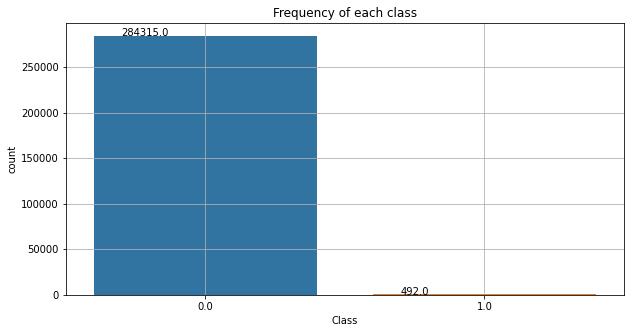

In [5]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = X[X.columns[len(X.columns) - 1]])
plt.title("Frequency of each class")
plt.grid(True)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))

## Let's look at the covariance matrix and correlation matrix of the normalized data

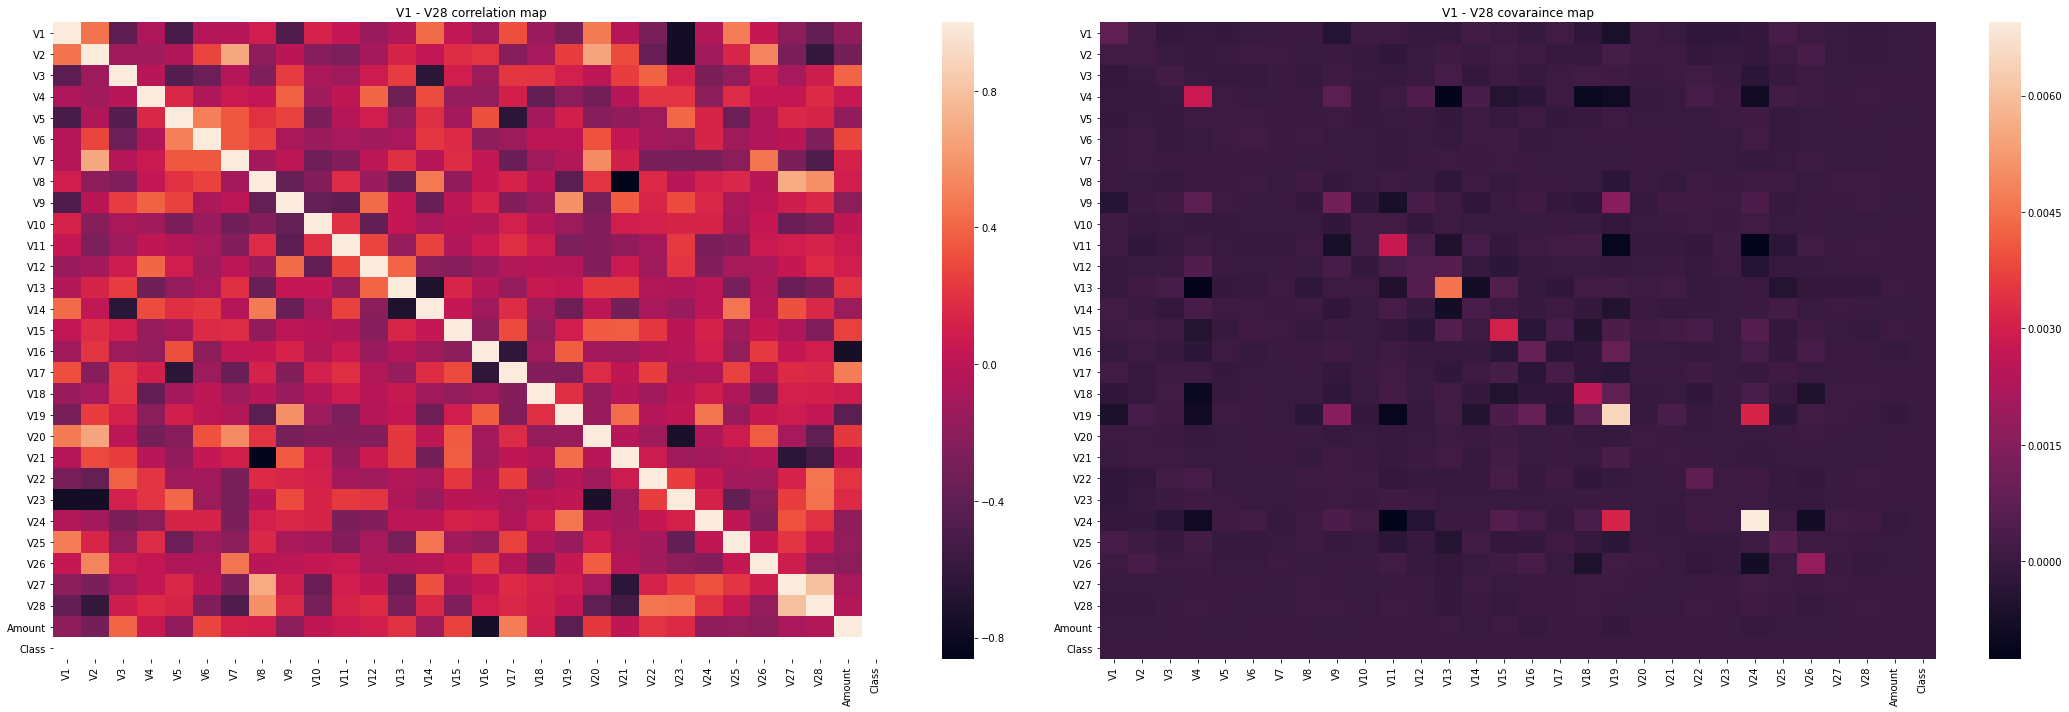

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30, 10))


plot1 = sns.heatmap(X[:28].corr(), ax = ax1)
plot1.set_title("V1 - V28 correlation map")

plot2 = sns.heatmap(X[:28].cov(), ax = ax2)
plot2.set_title("V1 - V28 covaraince map")

plt.tight_layout()
plt.show()

## Let's seperate out our data

In [7]:
#define the class we are trying to predict a
y = X[X.columns[len(X.columns) - 1]]
X = X[X.columns[:len(X.columns) - 1]]

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


## In this we are going to use Principal Component Analysis (PCA) to reduce the numbers of features

In [9]:
#now define the PCA
SEED = 42
pca = PCA(random_state = SEED)
pc = pca.fit_transform(X)

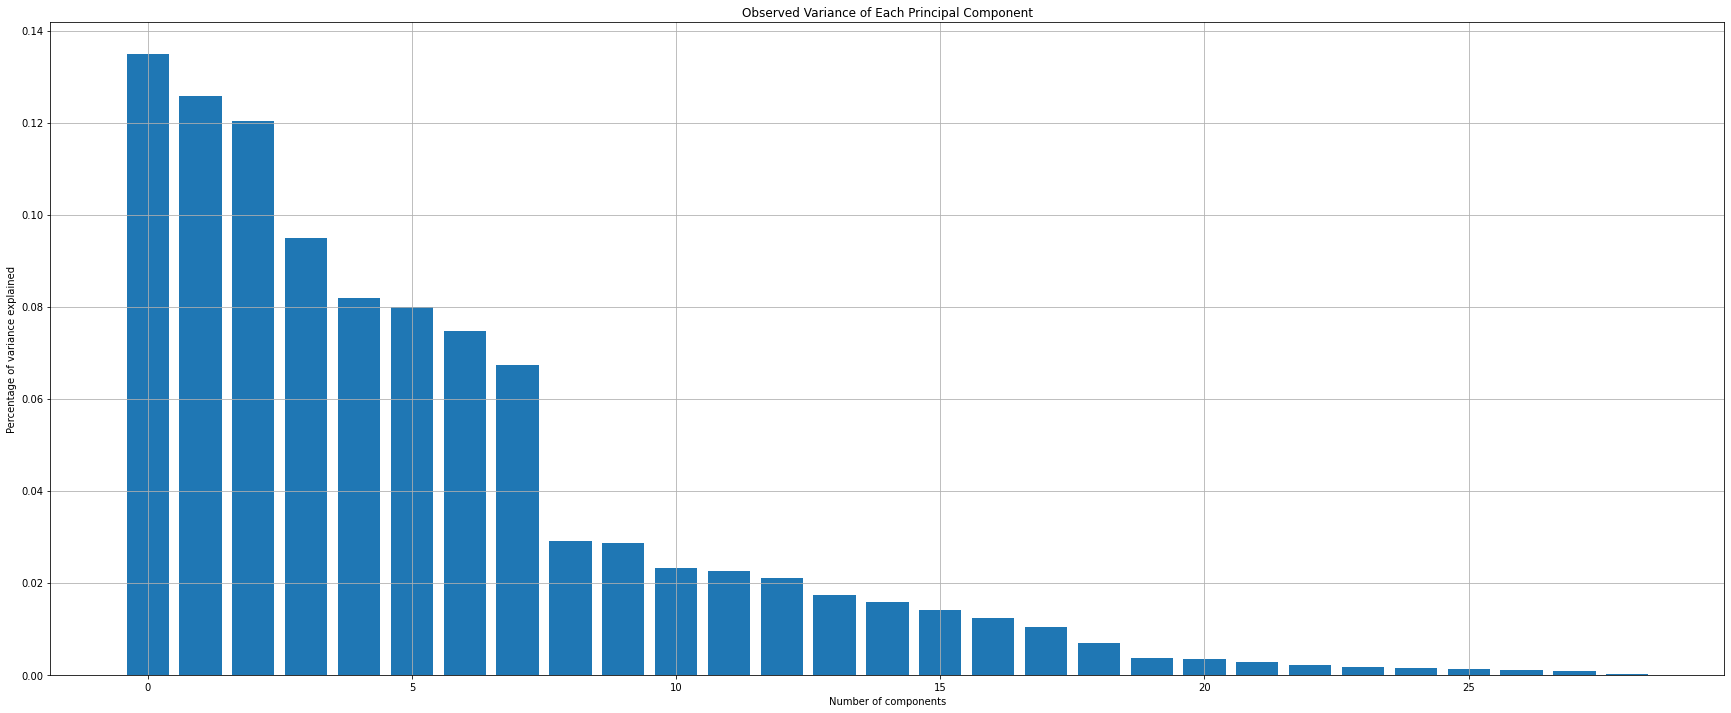

In [10]:
# Distribution of variance plot
n = X.shape[1]
x_axis = np.arange(n)
var_per = pca.explained_variance_ratio_


fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot()

ax.set_title("Observed Variance of Each Principal Component")
ax.set_xlabel('Number of components')
ax.set_ylabel('Percentage of variance explained')
ax.grid(True)

plt.bar(x_axis, var_per)
plt.show()

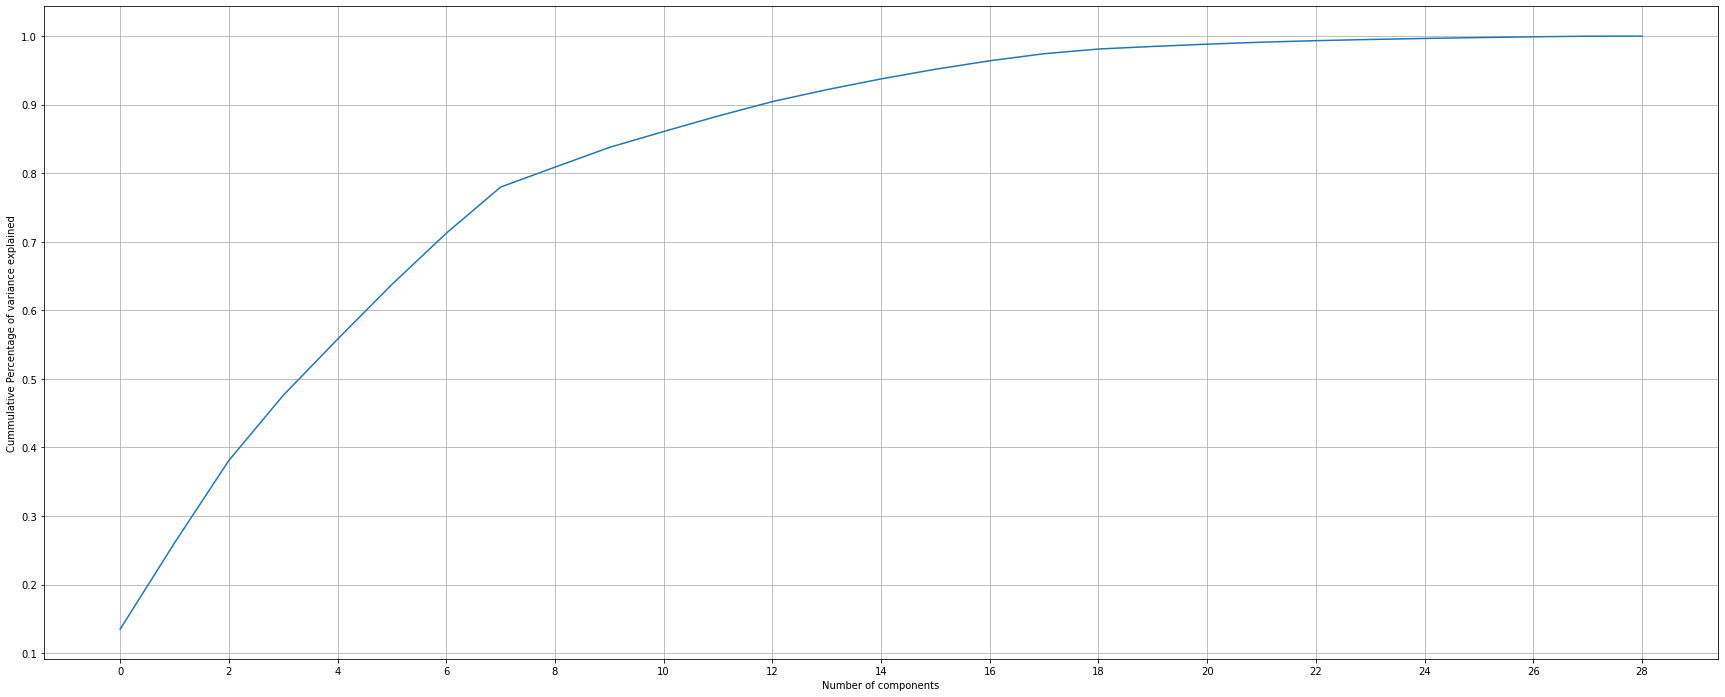

In [11]:
# sorted list of cummulative sums of explained variance
cumm_var = pca.explained_variance_ratio_.cumsum()

# plot to visualize the cummulative percentage of variance explained over the number of components
fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot()

ax.set_xlabel('Number of components')
ax.set_ylabel('Cummulative Percentage of variance explained')
ax.set_xticks(np.arange(0, 45, 2))
ax.set_yticks(np.arange(0,1.1, 0.1))

ax.grid()
plt.plot(cumm_var)
plt.show()

In [12]:
def pca_df(data, var_per):
    """
    Inputs:  data - data frame 
             var_per - float in [0,1]
    Returns: pca class of data
             data frame with PC that explain var_per% of the variance of data
    """
    #instantiate PCA 
    pca = PCA(random_state=SEED)
    data_pca = pca.fit_transform(data)
    cumm_var = pca.explained_variance_ratio_.cumsum()
    #number of columns that explain var_per% of variance
    n = np.argmax(cumm_var >= var_per)
    #names of columns in output dataframe
    col_names = ['PC' + str(k) for k in range(1, data_pca.shape[1]+1)]
    #drop cols not necessary to explain % of variance desired
    data_PC = pd.DataFrame(data_pca, columns = col_names).iloc[:,:(n-1)]
    
    return pca, data_PC

## The data set's principal components

In [13]:
X_pca,X_pc = pca_df(X,.8)
X_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.009020,-0.030892,-0.076738,0.109754,-0.031202,0.061295,-0.032801
1,-0.045796,0.020565,0.037858,0.047513,0.011453,0.019738,0.095902
2,-0.092871,-0.022728,0.055534,0.175360,0.176821,0.016072,0.037136
3,-0.158406,-0.036254,0.039306,-0.047205,0.096097,-0.038691,-0.013468
4,0.019035,0.082049,0.104177,0.013093,-0.062663,0.018177,-0.048931


## The distributions of our principal components

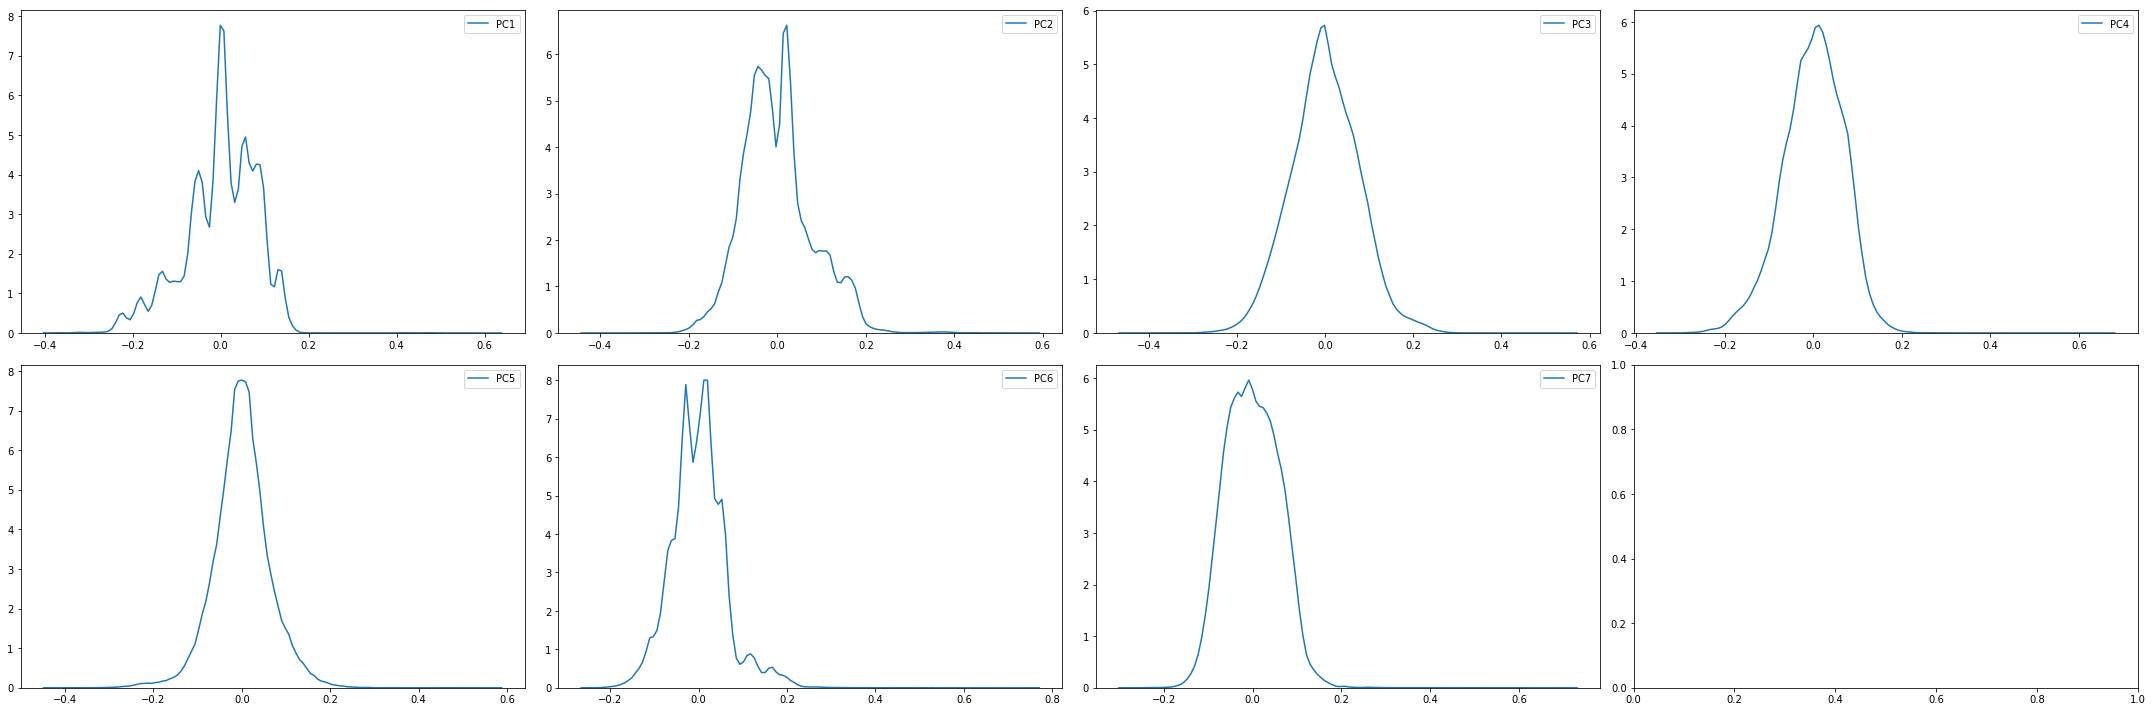

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(30, 10))
axes = axes.flatten()

for ax,i in zip(axes, X_pc.columns):
    sns.kdeplot(data= X_pc[i], ax=ax)
    
plt.tight_layout()
plt.show()

## The covariance matrix and correlation matrix of those principal components

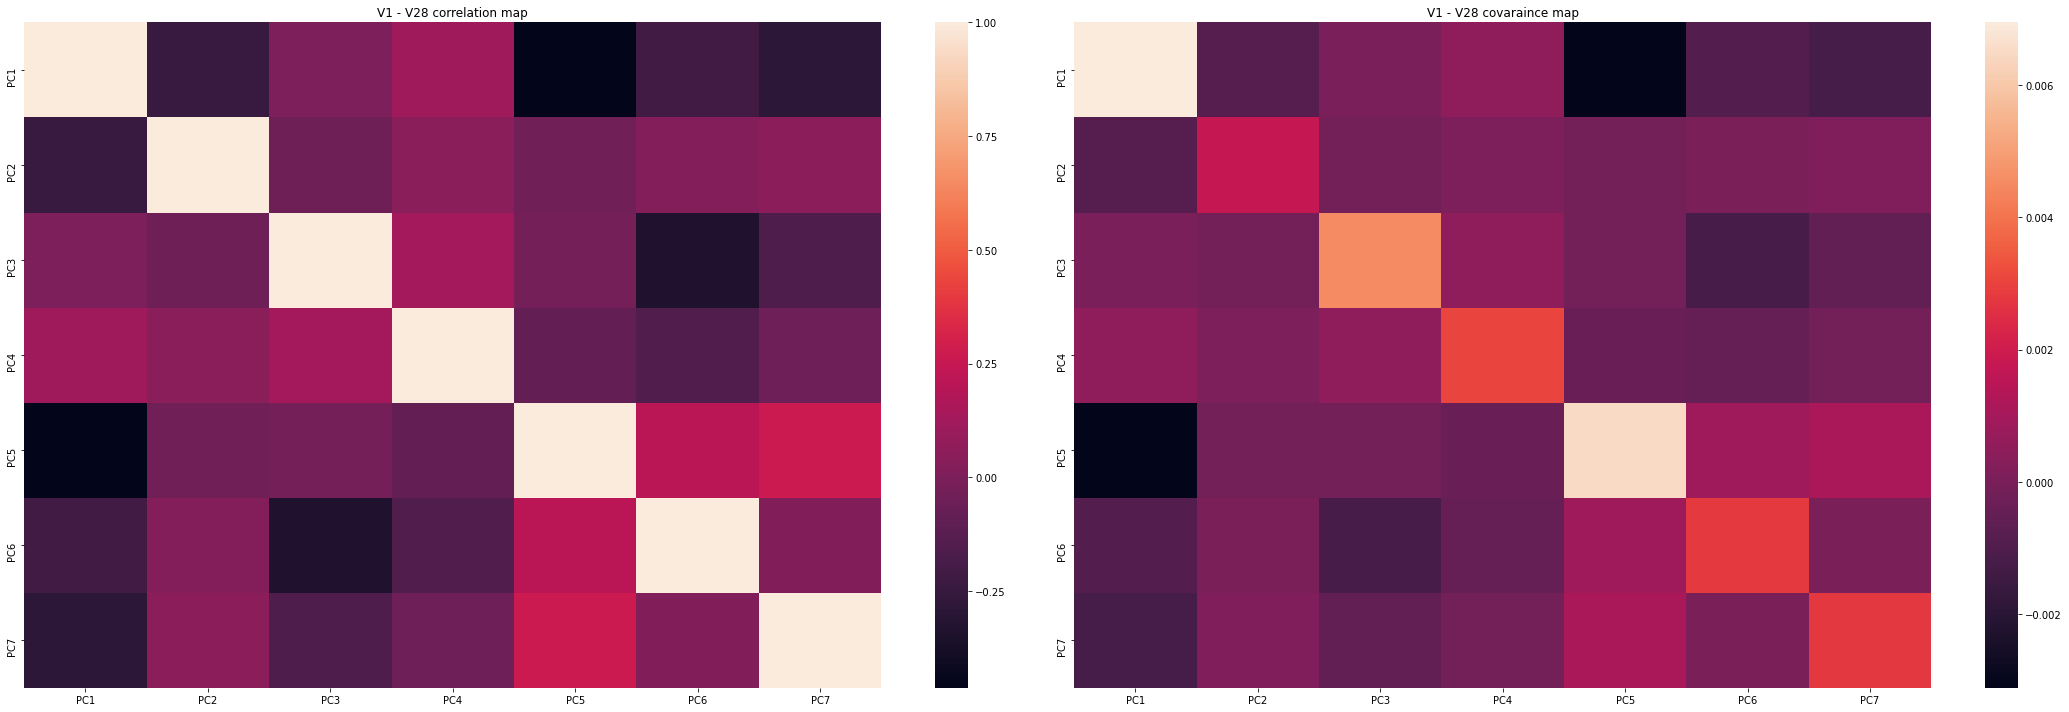

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30, 10))


plot1 = sns.heatmap(X_pc[:28].corr(), ax = ax1)
plot1.set_title("V1 - V28 correlation map")

plot2 = sns.heatmap(X_pc[:28].cov(), ax = ax2)
plot2.set_title("V1 - V28 covaraince map")

plt.tight_layout()
plt.show()

In [16]:
X_pc.to_csv("creditcardfraud_pca.csv")